In [2]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint



# Definir el sistema de ecuaciones diferenciales

def system(state, t):

  x, y = state

  dxdt = x - y

  dydt = -0.6*x**2 + 1 - 1.1*y

  return [dxdt, dydt]



# Crear condiciones iniciales distribuidas uniformemente en el plano

x_vals = np.linspace(-5, 5, 10) # Más puntos iniciales en el eje x

y_vals = np.linspace(-5, 5, 10) # Más puntos iniciales en el eje y

initial_conditions = [[x, y] for x in x_vals for y in y_vals] # Crear malla de condiciones iniciales



# Tiempo para resolver las trayectorias

t = np.linspace(0, 10, 1000) # Más pasos para trayectorias suaves

segment_count = 50 # Número de segmentos por trayectoria



# Graficar el diagrama de fases

plt.figure(figsize=(10, 10))



# Agregar trayectorias como segmentos de flechas

for ic in initial_conditions:

  trajectory = odeint(system, ic, t)

  

  # Dividir la trayectoria en segmentos equidistantes

  indices = np.linspace(0, len(trajectory) - 1, segment_count, dtype=int)

  for i in range(len(indices) - 1):

    x_start, y_start = trajectory[indices[i]]

    x_end, y_end = trajectory[indices[i + 1]]

    

    # Calcular el desplazamiento y normalizar la longitud de las flechas

    dx = x_end - x_start

    dy = y_end - y_start

    norm = np.sqrt(dx**2 + dy**2)

    scale = 0.3 # Escala uniforme para todas las flechas

    

    plt.arrow(

      x_start, y_start,

      dx / norm * scale, dy / norm * scale, # Normalización del tamaño

      head_width=0.15, head_length=0.15, fc='black', ec='black', alpha=0.7, length_includes_head=True

    )



# Configuración adicional del gráfico

plt.axhline(0, color="black", linewidth=0.8, linestyle="--") # Eje x

plt.axvline(0, color="black", linewidth=0.8, linestyle="--") # Eje y

plt.title("Diagrama de Fases con Flechas de Tamaño Uniforme")

plt.xlabel("x")

plt.ylabel("y")

plt.xlim(-5, 5)

plt.ylim(-5, 5)

plt.grid(True)

plt.show()

ModuleNotFoundError: No module named 'scipy'

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\3144982517.py:83: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\3144982517.py:85: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\3144982517.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


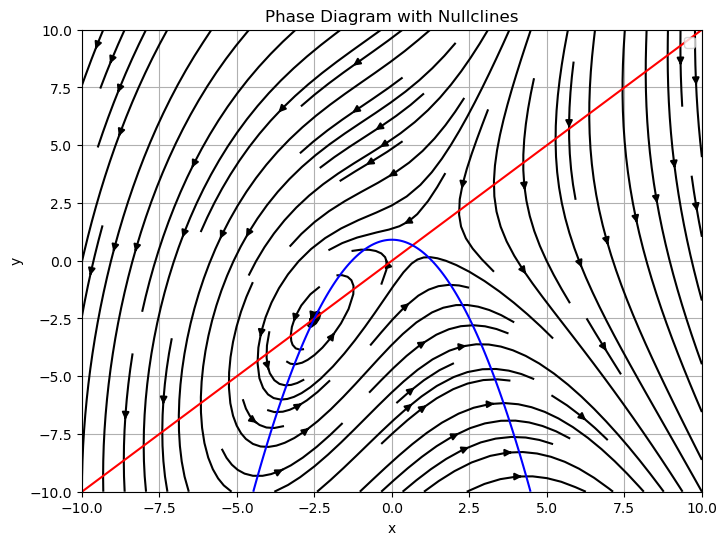

In [3]:
import numpy as np

import matplotlib.pyplot as plt



# Definir el sistema de ecuaciones diferenciales

def system(x, y):

  dxdt = x - y

  dydt = -6*x**2 + 1 - y

  return dxdt, dydt



# Crear una grilla uniforme

x_vals = np.linspace(-5, 5, 20) # Más puntos para un gráfico más denso

y_vals = np.linspace(-5, 5, 20)

X, Y = np.meshgrid(x_vals, y_vals)







import numpy as np

import matplotlib.pyplot as plt



# Define the system of differential equations

def system(x, y):

  dxdt = x - y

  dydt = -0.6*x**2 + 1 - 1.1*y

  return dxdt, dydt



# Create a grid of points

x = np.linspace(-10, 10, 400)

y = np.linspace(-10, 10, 400)

X, Y = np.meshgrid(x, y)



# Compute the derivatives at each point

DX, DY = system(X, Y)



# Plot the phase diagram

plt.figure(figsize=(8, 6))

plt.streamplot(X, Y, DX, DY, color='black')



# Calculate and plot the nullclines

nullcline_x = X - Y

nullcline_y = -0.6*X**2 + 1 - 1.1*Y



plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')

plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')



plt.xlabel('x')

plt.ylabel('y')

plt.title('Phase Diagram with Nullclines')

plt.grid()

plt.legend()

plt.show()

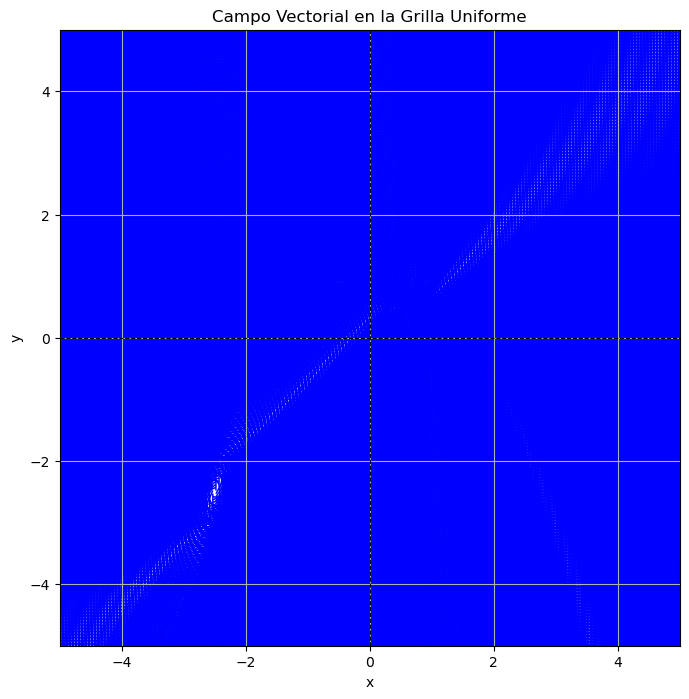

In [4]:
# Calcular el campo vectorial en cada punto de la grilla

U, V = system(X, Y)



# Normalizar los vectores para que todas las flechas tengan el mismo tamaño

magnitude = 3*np.sqrt(U**2 + V**2)

U /= magnitude

V /= magnitude



# Graficar el campo vectorial

plt.figure(figsize=(8, 8))

plt.quiver(X, Y, U, V, color="blue", angles="xy", scale_units="xy", scale=1)



# Configuración adicional del gráfico

plt.axhline(0, color="black", linewidth=0.8, linestyle="--") # Eje x

plt.axvline(0, color="black", linewidth=0.8, linestyle="--") # Eje y

plt.title("Campo Vectorial en la Grilla Uniforme")

plt.xlabel("x")

plt.ylabel("y")

plt.xlim(-5, 5)

plt.ylim(-5, 5)

plt.grid(True)

plt.show()

In [5]:
import numpy as np

import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider



# Define the system of differential equations with parameters

def system(x, y, a, b, c, d):

  dxdt = a * x**3 - b * x - y

  dydt = c * x**2 + 1 - d * y

  return dxdt, dydt



# Function to plot the phase diagram with nullclines

def plot_phase_diagram(a, b, c, d):

  # Create a grid of points

  x = np.linspace(-10, 10, 400)

  y = np.linspace(-10, 10, 400)

  X, Y = np.meshgrid(x, y)



  # Compute the derivatives at each point

  DX, DY = system(X, Y, a, b, c, d)



  # Plot the phase diagram

  plt.figure(figsize=(8, 6))

  plt.streamplot(X, Y, DX, DY, color='black')



  # Calculate and plot the nullclines

  nullcline_x = a * X**3 - b * X - Y

  nullcline_y = c * X**2 + 1 - d * Y



  plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')

  plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')



  plt.xlabel('x')

  plt.ylabel('y')

  plt.title('Phase Diagram with Nullclines')

  plt.grid()

  plt.legend()

  plt.show()



# Create sliders for the coefficients

a_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='a')

b_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='b')

c_slider = FloatSlider(min=-1, max=1, step=0.01, value=-0.6, description='c')

d_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='d')



# Use interact to update the plot with slider values

interact(plot_phase_diagram, a=a_slider, b=b_slider, c=c_slider, d=d_slider)

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

<function __main__.plot_phase_diagram(a, b, c, d)>

Valores propios de A: [3.99999998 4.00000002]
Vectores propios de A, primer vector:  0.8944271895803427   0.44721359833910407
segundo vector:  -0.8944271924194889   -0.4472135926608119


interactive(children=(FloatSlider(value=1.0, description='x', layout=Layout(height='50px', width='1200px'), ma…

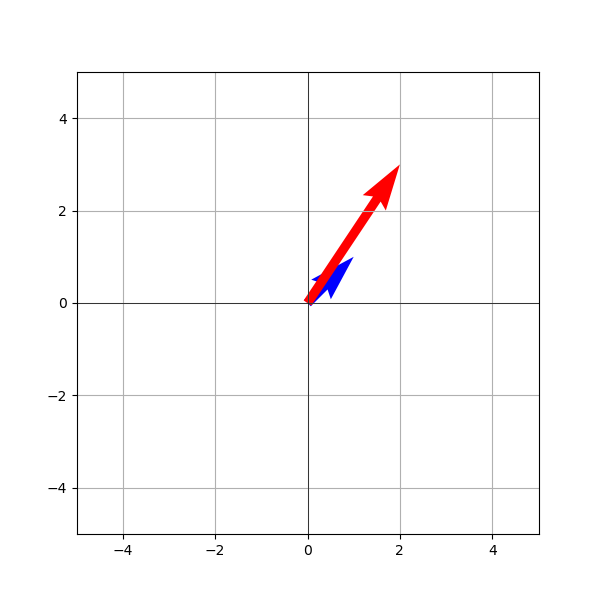

In [1]:
%matplotlib widget

# para que funcione el probrama de abajo, asegurarse que se intaló estos dos:

# conda install ipywidgets

#conda install -c conda-forge ipympl

# puede ser necesaario reinicciar VSC







"""

#raices reales y distintas

A = np.array([[1, -2],

        [-2, -1]])





#raíces reales e iguales

A = np.array([[3, -2],

        [1/2, 1]])



#raíces complejas

A = np.array([[1, -2],

        [1, -1]])



        """









import numpy as np

import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider, Layout



# If you're in Jupyter, make sure to enable an interactive backend:

# %matplotlib widget



# Define transformation matrix

A = np.array([[6, -4],

        [1, 2]])



# Calculate eigenvalues and eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Valores propios de A:", eigenvalues)

print("Vectores propios de A, primer vector: ", eigenvectors[0,0], " ", eigenvectors[1,0])

print("segundo vector: ", eigenvectors[0,1], " ", eigenvectors[1,1])





# Create a new figure and axes

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(-5, 5)

ax.set_ylim(-5, 5)

ax.grid(True)

ax.set_aspect('equal')



# Add coordinate axes

ax.axhline(y=0, color='k', linewidth=0.5)

ax.axvline(x=0, color='k', linewidth=0.5)



# Global quiver objects (initialized to None)

quiver_orig = None

quiver_trans = None



def plot_vectors(x, y):

  global quiver_orig, quiver_trans

  

  # Remove previous vectors if they exist

  if quiver_orig is not None:

    quiver_orig.remove()

  if quiver_trans is not None:

    quiver_trans.remove()

  

  # Original vector

  quiver_orig = ax.quiver(0, 0, x, y,

              angles='xy', scale_units='xy', scale=1,

              color='blue', width=0.02, label='(x, y)')



  # Transformed vector

  v = A @ np.array([x, y])

  quiver_trans = ax.quiver(0, 0, v[0], v[1],

               angles='xy', scale_units='xy', scale=1,

               color='red', width=0.02, label='A(x, y)')

  

  # Trigger an update of the figure

  fig.canvas.draw_idle()



# Create sliders with increased size

x_slider = FloatSlider(

  min=-5, max=5, step=0.01, value=1, description='x',

  layout=Layout(width='1200px', height='50px') # Larger size

)

y_slider = FloatSlider(

  min=-5, max=5, step=0.01, value=1, description='y',

  layout=Layout(width='1200px', height='50px') # Larger size

)



# Set up interactive widget

interact(plot_vectors, x=x_slider, y=y_slider)



plt.show()



In [2]:
# prompt: usando la matriz A, sus eigenvalues y sus eigenvectors, construir y mostrar las matrices para las cuales se cumple A=P*lambda*P-1 

import numpy as np

# Assuming A, eigenvalues, and eigenvectors are already defined as in the previous code

# Matrix A (from the previous code)
A = np.array([[6, -4],
              [1, 2]])

# Calculate eigenvalues and eigenvectors (from the previous code)
eigenvalues, eigenvectors = np.linalg.eig(A)

# Construct the diagonal matrix of eigenvalues (Lambda)
Lambda = np.diag(eigenvalues)

# Construct the matrix P from the eigenvectors
P = eigenvectors

# Calculate the inverse of matrix P
P_inv = np.linalg.inv(P)

# Reconstruct matrix A using P, Lambda, and P_inv
A_reconstructed = P @ Lambda @ P_inv

# Display the matrices
print("Original Matrix A:\n", A)
print("\nMatrix P (Eigenvectors):\n", P)
print("\nDiagonal Matrix Lambda (Eigenvalues):\n", Lambda)
print("\nInverse of Matrix P:\n", P_inv)
print("\nReconstructed Matrix A (P * Lambda * P^-1):\n", A_reconstructed)

Original Matrix A:
 [[ 6 -4]
 [ 1  2]]

Matrix P (Eigenvectors):
 [[ 0.89442719 -0.89442719]
 [ 0.4472136  -0.44721359]]

Diagonal Matrix Lambda (Eigenvalues):
 [[3.99999998 0.        ]
 [0.         4.00000002]]

Inverse of Matrix P:
 [[-7.04437150e+07  1.40887431e+08]
 [-7.04437159e+07  1.40887431e+08]]

Reconstructed Matrix A (P * Lambda * P^-1):
 [[ 5.99999999 -3.99999995]
 [ 1.          2.        ]]


In [3]:
import numpy as np

# Definir la matriz P
P = np.array([[0.85, 0.52],
              [-0.52, 0.85]])

# Calcular la inversa de P
P_inv = np.linalg.inv(P)

# Definir la matriz lambda
lambda_matrix = np.array([[2.23, 0],
                          [0, -2.23]])

# Multiplicar P por lambda y luego por la inversa de P
result1 = P @ lambda_matrix
final_result = result1 @ P_inv

# Mostrar el resultado final
print("El resultado final es:")
print(final_result)

El resultado final es:
[[ 1.01539229 -1.98541646]
 [-1.98541646 -1.01539229]]


In [4]:
import numpy as np

# Matriz A (raíces reales y distintas)
A = np.array([[1, -2],
              [-2, -1]])

# Cálculo de los valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

# Construcción de la matriz diagonal Lambda (valores propios)
Lambda = np.diag(eigenvalues)

# Matriz P formada por los vectores propios
P = eigenvectors

# Cálculo de la inversa de la matriz P
P_inv = np.linalg.inv(P)

# Reconstrucción de la matriz A usando P, Lambda y P_inv
A_reconstructed = P @ Lambda @ P_inv

# Mostrar las matrices
print("Matriz Original A:\n", A)
print("\nMatriz P (Vectores Propios):\n", P)
print("\nMatriz Diagonal Lambda (Valores Propios):\n", Lambda)
print("\nMatriz Inversa de P:\n", P_inv)
print("\nMatriz Reconstruida A (P * Lambda * P^-1):\n", A_reconstructed)


Matriz Original A:
 [[ 1 -2]
 [-2 -1]]

Matriz P (Vectores Propios):
 [[ 0.85065081  0.52573111]
 [-0.52573111  0.85065081]]

Matriz Diagonal Lambda (Valores Propios):
 [[ 2.23606798  0.        ]
 [ 0.         -2.23606798]]

Matriz Inversa de P:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]

Matriz Reconstruida A (P * Lambda * P^-1):
 [[ 1. -2.]
 [-2. -1.]]
